# Natural Disasters In the United States
### *What exactly is going on?*

Floods, Hurricanes, Earthquakes are all examples of natural disasters that cause major destruction and death. The data set I picked for my assignment contains information on various different types of disasters that have happened in the US since 1953. In this assignment my goal is not only to answer some questions but also hope to lead to more questions and hypotheses based on my data. 

In the first part of my assignment, I investigate the relationship between disasters and the regions in which they occured in.  For example, does being in the south, such as Florida, mean that there will be more frequent floods/hurricanes due to it being near the Ocean. Or does being near the equator mean that there will be fires?

This information is particularly important when deciding how buildings and other structures such as roads and bridges should be built according to the type of damage that may be inflicted on them. Having well thought out emergency plans is also crucial to ensure the survival of civilians. 
In the second part of my assignment 

In the second part of my assignment, I investigate the frequency of natural disasters throughout the years starting from 1960 and ending in 2019. A lot of news stories talk about how natural disasters have been increasing due to climate change. I want to observe it myself and see the patterns they are talking about.

Finally, I observe if the proportions of natural disasters have been staying the same or increasing. If they do change, what questions or hypothesis’ can be made from the data?


### Hypothesis ###

I hypothesize that due to climate change, there has been a positive linear increase in natural disasters in the past 60 years.


<div>
<img src="hurricane.webp" width="500"/>
</div>

##### *Above is a picture of Hurricane Katrina, a deadly hurricane that occured in 2005. It swept through the south of The United States. This disaster led to the death of over 1800 people making it one of the most deadliest natural disasters in the US* 
*Image source: https://www.britannica.com/event/Hurricane-Katrina*

## 2. Methods
### 2.1 Data Collection

Data is retrived from Kaggle: [US Natural Disaster Declarations](https://www.kaggle.com/datasets/headsortails/us-natural-disaster-declarations/data)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Read the data and explored what columns I wanted to analyze
disasters = pd.read_csv("usdisaster.csv")
display(disasters)

,state,declaration_type,fy_declared,incident_type,incident_begin_date,incident_end_date
0,GA,DR,1953,Tornado,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z
1,TX,DR,1953,Tornado,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z
2,LA,DR,1953,Flood,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z
3,MI,DR,1953,Tornado,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z
4,MT,DR,1953,Flood,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z
...,...,...,...,...,...,...
64087,ME,DR,2023,Severe Storm,2022-12-23T00:00:00Z,2022-12-24T00:00:00Z
64088,MS,DR,2023,Severe Storm,2023-03-24T00:00:00Z,2023-03-25T00:00:00Z
64089,MS,DR,2023,Severe Storm,2023-03-24T00:00:00Z,2023-03-25T00:00:00Z
64090,MS,DR,2023,Severe Storm,2023-03-24T00:00:00Z,2023-03-25T00:00:00Z


### 2.2 Data Cleaning

The disasters data set originally was about 20 MB of data and I trimmed the CSV file by getting rid of columns that are not important to my analysis. Even though the file is less than 5 megabytes now, there is still a lot of cleaning left to do

Firstly, I trimmed my data to look at disasters after 1960 and before 2020. This is to ensure that when data is summarized by decade we have the complete picture and we aren't looking at the decade of 1950 or 2020 when the data for those decades isn't complete

In [3]:
disasters = disasters.loc[disasters['fy_declared'] >= 1960]
disasters = disasters.loc[disasters['fy_declared'] < 2020]

Here I organize the column names so they are easy to read

In [4]:
disasters.columns = ["State","Declaration Type","Year","Incident Type","Begin Date","End Date"]
disasters = disasters.replace({'Declaration Type' : {'DR' : 'Major Disaster', 'EM' : 'Emergency Management', 'FM' : "Emergency Management"}})

Since there are over 50 states I divided them into their 4 regions for them to be easily recognizable but still show a distinction based on their geography. This is also helpful for when I do further data analysis as it provides a simple generalization


In [5]:
northeast = ['ME', 'VT','NH','MA','CT','RI','NY','NJ','PA']
west = ['WA','ID','MT','OR','WY','CA','NV','UT','CO','AZ','NM','AK','HI']
midwest = ['ND','MN','WI','MI','SD','IA','IL','IN','OH','NE','KS','MO']
south = ['TX','OK','AR','LA','MS','AL','TN','KY','WV','DE','MD','VA','NC','SC','GA','FL']


disasters.loc[disasters['State'].isin(northeast), 'Region'] = "Northeast"
disasters.loc[disasters['State'].isin(west), 'Region'] = "West"
disasters.loc[disasters['State'].isin(midwest), 'Region'] = "Midwest"
disasters.loc[disasters['State'].isin(south), 'Region'] = "South"
disasters = disasters.dropna()
disasters = disasters.drop(["Begin Date","End Date","State"],axis=1)


The data set came with many different types of natural disasters. For this assignment I chose to focus on the 5 main natural disasters that are the most destructive: Tornados, Earthquakes, Floods, Fires and Hurricanes

In [6]:
observations = ['Tornado','Earthquake','Flood','Fire','Hurricane']
disasters = disasters.loc[disasters['Incident Type'].isin(observations)]


In [7]:
display(disasters)

,Declaration Type,Year,Incident Type,Region
93,Major Disaster,1960,Flood,South
94,Major Disaster,1960,Earthquake,West
96,Major Disaster,1960,Flood,Midwest
97,Major Disaster,1960,Flood,Midwest
98,Major Disaster,1960,Flood,Midwest
...,...,...,...,...
50893,Major Disaster,2019,Hurricane,South
50894,Major Disaster,2019,Hurricane,South
50895,Major Disaster,2019,Hurricane,South
50896,Major Disaster,2019,Hurricane,South


## Analysis
First I will explore explore where different natural disasters occur using dataframes and plots. Then I will explore how the frequency of natural disasters have been changing over the years. Finally I will explore the proportion of natural disasters happening each decade.

### Disasters vs Regions
From the graph shown below, that in the last 50 years, the south region of the united states experiences a lot of hurricanes while
the midwest experiences a lot of floods. Fires tend to happen mostly in the south and west while tornados seldomly happen mostly in the midwest and south. Earthquakes are pretty rare and have mostly occured in the west.

Looking at a more detailed data frame below, we can see that 40% of Natural Disasters we are analyzing are Hurricanes and Floods while around 12% are fires, 6% are tornados and less than 0.5% are earthquakes

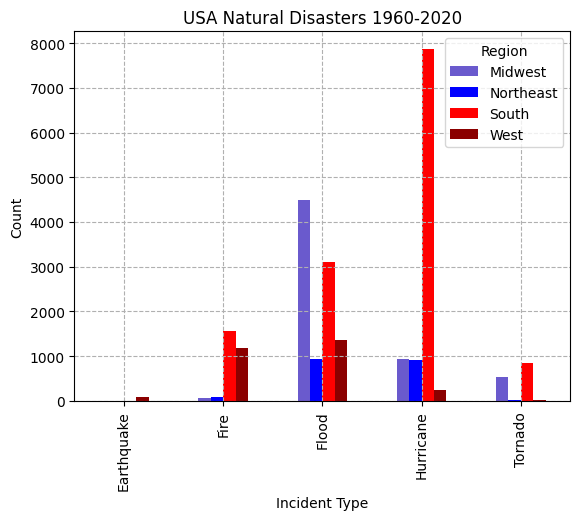

In [8]:
regionGroup = disasters.groupby(['Incident Type','Region']).size().unstack()
regionGroup = regionGroup.fillna(0)
regionBarPlot = regionGroup.plot.bar(color={"Midwest":"slateblue","Northeast":"blue",
                                            "South":"red","West":"darkred"},
                                            title="USA Natural Disasters 1960-2020")
plt.grid(ls='--')
plt.ylabel("Count")
plt.show()

In [9]:
regionGroup['Total Incidents'] = regionGroup.sum(axis=1)
total = regionGroup['Total Incidents'].sum()
regionGroup['Percent (%)'] = (round((regionGroup['Total Incidents']/total),4))*100
regionGroup['Average/Year'] = (round(regionGroup['Total Incidents']/(2020-1960),0))

sum = regionGroup.sum(axis=0)
sum = sum.drop("Total Incidents")
sum = sum.drop("Percent (%)")
sum = sum.drop("Average/Year")

display(regionGroup)

print("---------------------------------")
print("A descriptive analysis")
print(f"Most Common Incident Per Region\n")
regions = ["Midwest","Northeast","South","West"]
for x in regions:
    print(f"The {x}: {regionGroup[x].idxmax()}'s with a total of {regionGroup[x].max()} occurences")
print("---------------------------------")
print(f"The most common incident overall: {regionGroup["Total Incidents"].idxmax()}")
print(f"The least common incident overall: {regionGroup["Total Incidents"].idxmin()}\n")

print(f"The region with the most incidents: {sum.idxmax()} with a total of {sum.max()}")
print(f"The region with the least incidents: {sum.idxmin()} with a total of {sum.min()}")
print("---------------------------------")


Region,Midwest,Northeast,South,West,Total Incidents,Percent (%),Average/Year
Incident Type,,,,,,,
Earthquake,0.0,6.0,10.0,89.0,105.0,0.43,2.0
Fire,62.0,93.0,1565.0,1187.0,2907.0,11.96,48.0
Flood,4494.0,927.0,3112.0,1367.0,9900.0,40.75,165.0
Hurricane,939.0,906.0,7868.0,240.0,9953.0,40.97,166.0
Tornado,535.0,25.0,840.0,31.0,1431.0,5.89,24.0


---------------------------------
A descriptive analysis
Most Common Incident Per Region

The Midwest: Flood's with a total of 4494.0 occurences
The Northeast: Flood's with a total of 927.0 occurences
The South: Hurricane's with a total of 7868.0 occurences
The West: Flood's with a total of 1367.0 occurences
---------------------------------
The most common incident overall: Hurricane
The least common incident overall: Earthquake

The region with the most incidents: South with a total of 13395.0
The region with the least incidents: Northeast with a total of 1957.0
---------------------------------


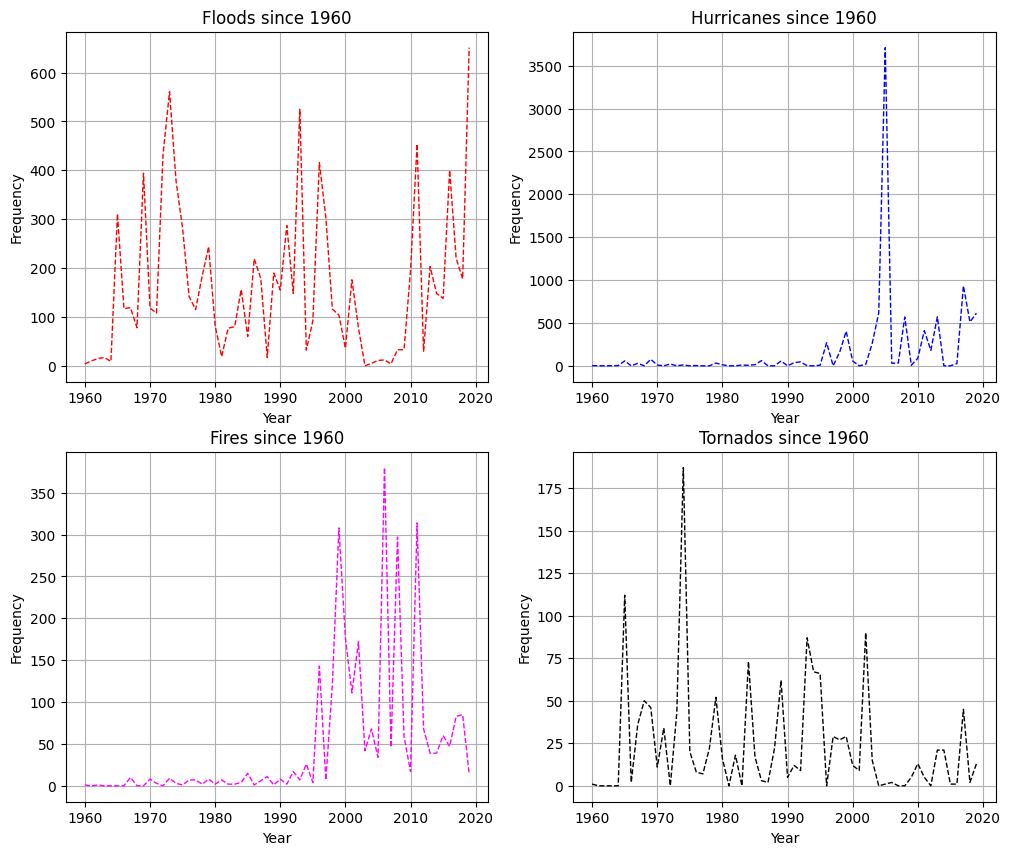

In [10]:
yearGroup = disasters.groupby(['Incident Type','Year']).size().unstack()
yearGroup = yearGroup.fillna(0)

fig, axes = plt.subplots(2,2, figsize = (12,10))
a = sns.lineplot(x=yearGroup.columns,y=yearGroup.loc['Flood'] ,ax=axes[0,0],
            color='red',linestyle='dashed',linewidth=1)
a.set(title="Floods since 1960",ylabel='Frequency')
a.grid()
b = sns.lineplot(x=yearGroup.columns,y=yearGroup.loc['Hurricane'] ,ax=axes[0,1],
            color='blue',linestyle='dashed',linewidth=1)
b.set(title="Hurricanes since 1960",ylabel='Frequency')
b.grid()
c = sns.lineplot(x=yearGroup.columns,y=yearGroup.loc['Fire'] ,ax=axes[1,0],
            color='fuchsia',linestyle='dashed',linewidth=1)
c.set(title="Fires since 1960",ylabel='Frequency')
c.grid()
c = sns.lineplot(x=yearGroup.columns,y=yearGroup.loc['Tornado'] ,ax=axes[1,1],
            color='black',linestyle='dashed',linewidth=1)
c.set(title="Tornados since 1960",ylabel='Frequency')
c.grid()


### The relationship between the number of disasters over the years

Unlike my hypothesis, my data shows that some disasters have been pretty consistent in their patterns while others have gone up. 
* Floods:
<br>    Floods have almost a sinusoidal pattern to them. Every few years the number of them seem to increase and then start to decrease. This cycle has been repeating consistently for the past few fears.
 It is interesting to note that the peaks were recently decreasing but suddenly increased to a new high right before the start of 2020

* Hurricanes
<br>    From 1960 to around the mid 1990s the data states that hurricanes did not occur frequently. However ever since then they have been increasing rapidly, following a sinusoidal pattern. There was an all time peak in the early 2000s and then dipped. However, the peaks are still increasing every few years

* Fires:
<br>    Fires have also been increasing similary to hurricanes, at a lower frequency however, but they follow an increasing sinusoidal pattern where was they were pretty rare from 1960 to the 1990s

* Tornados:
<br>    Tornados have actually been decreasing since 1960 in a sinusoidal pattern

In [11]:
disastersCopy = disasters
disastersCopy['Year'] = (np.floor(disastersCopy['Year']/10)*10)
decadeDF = disastersCopy.groupby(['Year','Incident Type']).size().unstack()
decadeDF['Total'] = decadeDF.sum(axis=1)
display(decadeDF)

Incident Type,Earthquake,Fire,Flood,Hurricane,Tornado,Total
Year,,,,,,
1960.0,8,12,1074,169,247,1510
1970.0,3,48,2564,75,384,3074
1980.0,7,51,1079,156,213,1506
1990.0,23,644,2178,921,331,4097
2000.0,43,1386,388,5298,134,7249
2010.0,21,766,2617,3334,122,6860


Overall, we can see that the total number of natural disasters each decade since 1960 has been going up. 

### 3.3 Proportion Analyzing
Now I will analyze the proportion of natural disasters that happen each year.

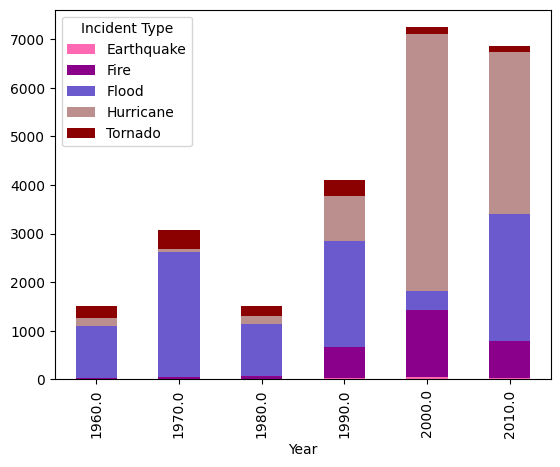

In [12]:
#I am gonna turn the data frame above to return a proportion instead of the total
decadeDF = decadeDF.drop(columns=['Total'])
col = ["hotpink","darkmagenta","slateblue","rosybrown","darkred"]
bplot = decadeDF.plot.bar(stacked=True,color=col)
plt.show()

Using the data above, we can see that in the 1960s, a huge proportion of natural disasters came from floods. The following year the total number of natural disasters increased but the proportions were generally the same. However, a shift started in 1990 where the proportion of natural disasters caused by Hurricanes grew significantly. The proportion of Fires increased aswell. By 2000 hurricanes accounted for a huge majority of natural disasters where as floods only accounted for a tiny amount. We also see that the proportion of natural disasters being Tornados have been decreasing each decade.

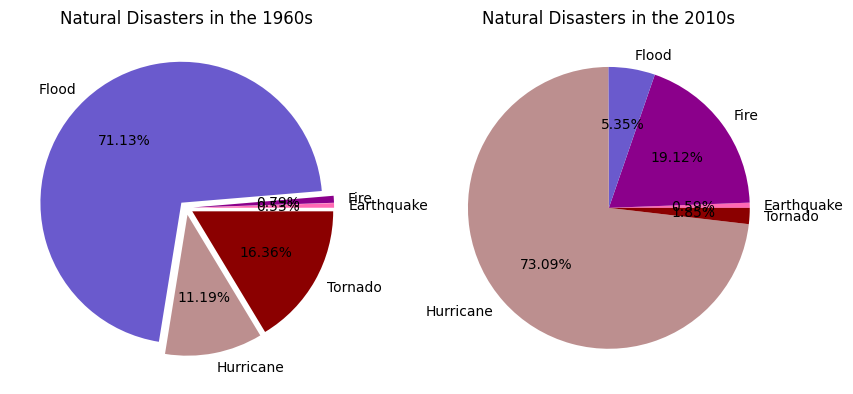

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))


axes[0].pie(decadeDF.iloc[0].to_list(),labels = decadeDF.columns,autopct='%1.2f%%',colors=col,explode=[0.05,0.05,0.05,0.05,0.05])

axes[1].pie(decadeDF.iloc[4].to_list(),labels=decadeDF.columns,autopct='%1.2f%%',colors=col)

axes[0].set(title="Natural Disasters in the 1960s")
axes[1].set(title="Natural Disasters in the 2010s")
plt.show()

Using the Pi charts above, we can compare the proportion of natural disasters in 1960 and 2010.
The proportion of floods decreased by 66% while the proportion of hurricanes increased by 62%
Fire's increased by 18%, and Tornados decreased by 14%. The proportion of earthquakes stayed pretty much the same. 

## Discussion ##

In this assignment, I investigated natural disasters with respect to the region they occur in and the year/decade they occured.
My analysis did support my hypothesis that natural disasters have been increasing, but not in a linear fashion. They are increasing in a sinusoidal fashion where one year there is a high frequency of disasters, which seem to lower after a while but then shoot up even higher. Hurricanes have been increasing at a pretty fast rate since 1960 which may infact be due to climate change. The proportion of fires have decreased a lot which may be due to drier climates. For anyone looking to move to the US and want to live in a safe place this data is useful.
The Northeast part of the US is the safest wehere as the south is the most dangerous. Buildings in the south should be prepared to deal with Hurricanes as well as have safety measures in place. Fires are usually more prevelant in the South and West. This means that different plans would need to be in place there. For example helicopters should be on standby to help control the spread of fire as well as there should be more fire trucks. Besides that, the US mostly deals with fires and hurricanes more recently but a few decades ago it mostly dealth with floods and tornados.

#### Why should this matter?

Changes in disasters are crucial to keep up with. Emergency plans should be adaptive and schools should teach children what to do in case of an emergency. Another thing to note is that while humans can be somewhat quick in adapting to such sharp changes animals are not and we need to care for them as well. It is important to zoom in on the factors that cause them so we can either prepare for them or prevent them. It is clear the recent increase of natural disasters is part due to climate change but there also might be several other variables to account for the sinusoidal changes. Using this data, predictions can be made to help get ahead of any drastic changes in natural disaster patterns/frequences.

## References ##

1. Data From: https://www.kaggle.com/datasets/headsortails/us-natural-disaster-declarations/data
2. Pandas for data organization
3. Seaborn for graphs
4. Matplotlib for graphs
5. Numpy for math analysis